In [176]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm.auto import tqdm


In [177]:
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def rosenbrock_grad(params):
    x, y = params[0], params[1]
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return torch.tensor([dx, dy])

In [178]:
def gradient_descent(learning_rate, max_iter, initial_params, epsilon=1e-4):
  # inicialização
  params = initial_params.clone().detach()
  loss_history = []
  hyperparams_history = [params.detach().clone()]

  for i in tqdm(range(max_iter)):
    # forward
    loss = rosenbrock(params[0], params[1])
    loss_history.append(loss.detach().item())

    # backward
    gradient = rosenbrock_grad(params)

    params -= learning_rate * gradient

    hyperparams_history.append(params.detach().clone())

    # if torch.norm(gradient) < epsilon:
    #   print(f"convergiu após {i + 1} iterações com learning rate: {learning_rate}")
    #   print(f"Ponto final: {params[0]}, {params[1]} \n Erro: {loss}")
    #   print(f"Gradient: {gradient}")
    #   break
  return torch.stack(hyperparams_history), loss_history, i + 1



In [179]:
def stochastic_gradient_descent(learning_rate, max_iter, initial_params, dp=5.0, epsilon=1e-4):
  params = initial_params.clone().detach()
  params_history = [params.detach().clone()]
  for epoch in tqdm(range(max_iter)):

    gradient = rosenbrock_grad(params)
    noise = torch.normal(mean=0.0, std=dp, size=gradient.shape)
    gradient += noise

    params -= learning_rate * gradient
    params_history.append(params.detach().clone())

    # print(f"loss: {torch.norm(gradient)}")
    # if (torch.norm(gradient) < epsilon):
    #   print(f"convergiu após {epoch + 1} iterações com learning rate de {learning_rate}")
    #   print(f"Ponto final: {params[0]}, {params[1]}")
    #   print(f"Gradient: {gradient}")
    #   break
    
  return torch.stack(params_history), torch.norm(gradient) ,epoch + 1

In [180]:
def adam_gradient_descent(learning_rate, max_iter, initial_params, beta1=0.9, beta2=0.999, epsilon=1e-8):
  params = initial_params
  params_history = [params.detach().clone()]
  mt = torch.zeros_like(params)
  vt = torch.zeros_like(params)

  for epoch in tqdm(range(max_iter)):
    gradient = rosenbrock_grad(params)

    mt = beta1 * mt + (1 - beta1) * gradient
    vt = beta2 * vt + (1 - beta2) * (gradient * gradient)
    mt_hat = mt / (1 - beta1**(epoch + 1))
    vt_hat = vt / (1 - beta2**(epoch + 1))

    params -= mt_hat * learning_rate / (torch.sqrt(vt_hat) + epsilon)
    params_history.append(params.detach().clone())

    # if (torch.norm(gradient) < 1e-4):
    #   print(f"convergiu após {epoch + 1} iterações com learning rate de {learning_rate}")
    #   print(f"Ponto final: {params[0]}, {params[1]}")
    #   print(f"Gradient: {torch.norm(gradient)}")
    #   break
      
  return torch.stack(params_history), torch.norm(gradient), epoch + 1

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

lowest_loss: 100 
 best lr: 1
torch.Size([501, 2])


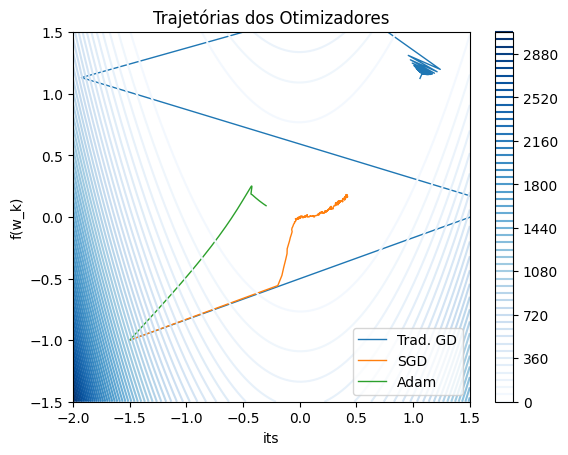

In [181]:
learning_rate = np.arange(start=1e-5, stop=1e-3, step=1e-5)
best_learning_rate_gd = 0.00168
best_learning_rate_sgd = 0.00067
best_learning_rate_adamgd = 0.04
max_iter = 500
epsilon = 1e-3
initial_params = torch.Tensor([-1.5, -1.0])
loss_history = None
adam_last_loss = 0
lowest_loss = 100
lowest_loss_lr = 1

iterations = torch.arange(1, max_iter + 2)


gd_param_history, gd_loss_history, gd_num_iters = gradient_descent(learning_rate=best_learning_rate_gd, max_iter=max_iter, initial_params=initial_params, epsilon=epsilon)
plt.plot(gd_param_history.numpy()[:, 0], gd_param_history.numpy()[:, 1], linestyle='-', label="Trad. GD", markersize=4, linewidth=1)


sgd_param_history, sgd_last_loss, sgd_num_iters = stochastic_gradient_descent(learning_rate=best_learning_rate_sgd, max_iter=max_iter, initial_params=initial_params, dp=5.0, epsilon=epsilon)
plt.plot(sgd_param_history.numpy()[:, 0], sgd_param_history.numpy()[:, 1], linestyle='-', label="SGD", markersize=4, linewidth=1)


adam_param_history, adam_last_loss, adam_num_iters = adam_gradient_descent(learning_rate=best_learning_rate_adamgd, max_iter=max_iter, initial_params=initial_params.clone(), beta1=0.9, beta2= 0.999, epsilon=1e-8)
plt.plot(adam_param_history.numpy()[:, 0], adam_param_history.numpy()[:, 1], linestyle='-', label="Adam", markersize=4, linewidth=1)



print(f"lowest_loss: {lowest_loss} \n best lr: {lowest_loss_lr}")
x_lim = [-2, 1.5]
y_lim = [-1.5, 1.5]

x_values = np.linspace(x_lim[0], x_lim[1], 100)
y_values = np.linspace(y_lim[0], y_lim[1], 100)

x, y = np.meshgrid(x_values, y_values)

z = rosenbrock(x, y)
plt.contour(x, y, z, levels=50, cmap='Blues')
plt.colorbar()
print(adam_param_history.shape)


# plt.scatter([1.0], [1.0], color='red', zorder=5, label='Mínimo (1, 1)')
plt.xlabel('its')
plt.ylabel('f(w_k)')
plt.legend()

plt.xlim(x_lim[0], x_lim[1])
plt.ylim(y_lim[0], y_lim[1])
plt.title(f'Trajetórias dos Otimizadores')
plt.show()


tensor([-1.5000, -0.1940, -0.1578, -0.1408, -0.1249, -0.1125, -0.1111, -0.0991,
        -0.0910, -0.0829])


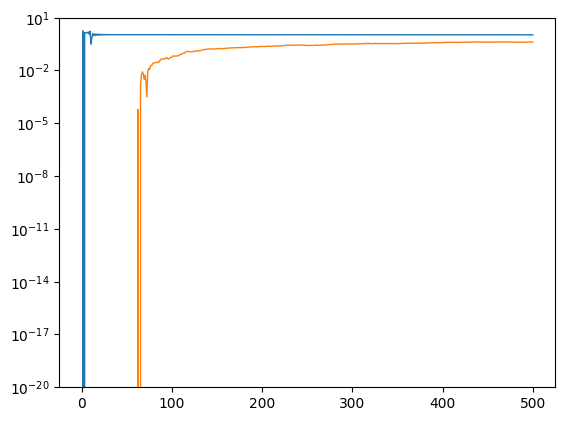

In [ ]:
iterations = torch.arange(0, adam_param_history.shape[0])

plt.semilogy(iterations.numpy(), gd_param_history.numpy()[:, 0], linestyle='-', label="Trad. GD", markersize=4, linewidth=1)
plt.semilogy(iterations.numpy(), sgd_param_history.numpy()[:, 0], linestyle='-', label="SGD", markersize=4, linewidth=1)
print(sgd_param_history[:10, 0])
plt.semilogy(iterations.numpy(), adam_param_history.numpy()[:, 0],  linestyle='-', label="Adam", markersize=4, linewidth=1)
plt.ylim(1e-2, 10)
plt.show()